EDA

unique videos

Summary Statistics:

         Unnamed: 0    categoryId  thumbnails.default.width  \
count  24784.000000  24784.000000                   24784.0   
mean   13823.430358     20.583280                     120.0   
std     8138.968675      7.724669                       0.0   
min        0.000000      1.000000                     120.0   
25%     6721.500000     20.000000                     120.0   
50%    13619.500000     22.000000                     120.0   
75%    20909.250000     26.000000                     120.0   
max    27948.000000     44.000000                     120.0   

       thumbnails.default.height  thumbnails.medium.width  \
count                    24784.0                  24784.0   
mean                        90.0                    320.0   
std                          0.0                      0.0   
min                         90.0                    320.0   
25%                         90.0                    320.0   
50%                         90.0             

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



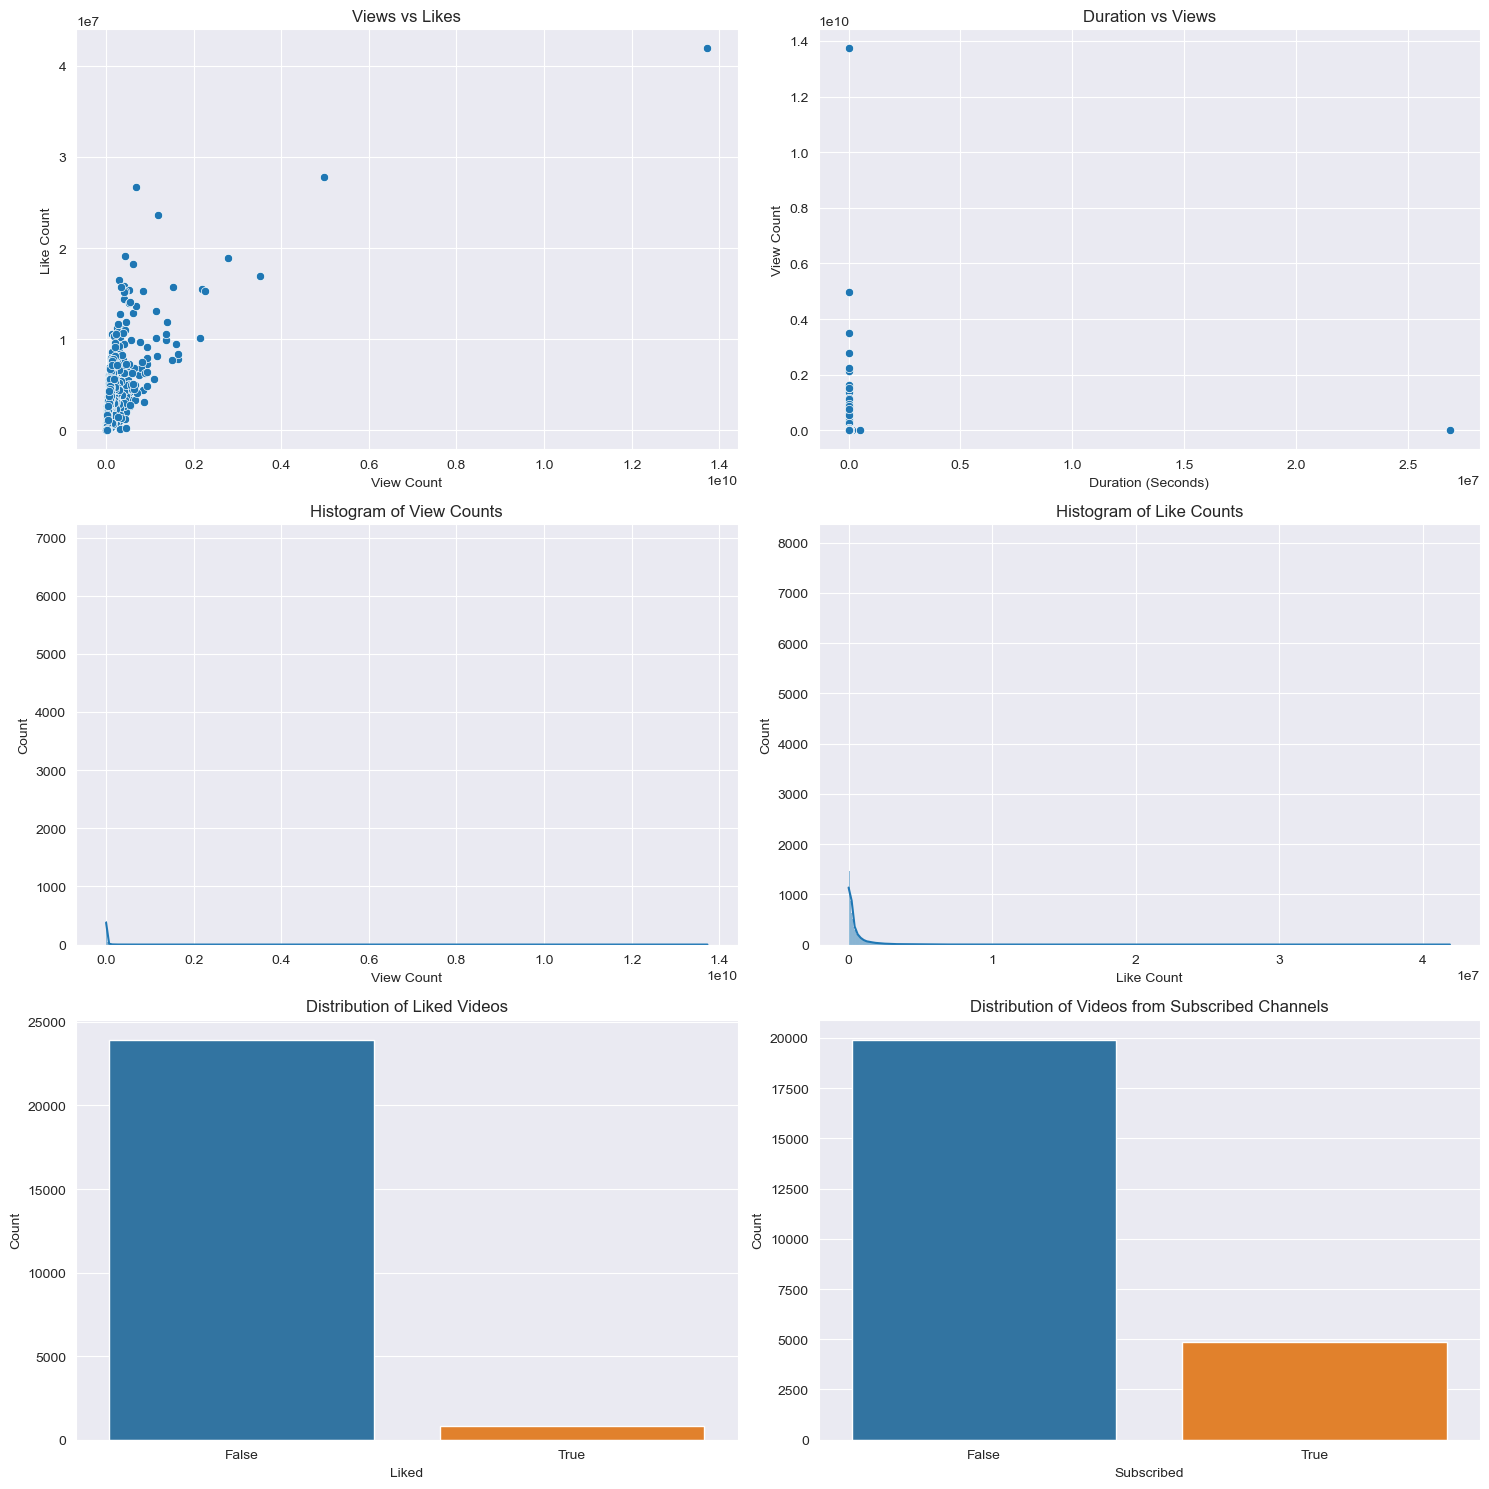

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('data.csv').drop_duplicates(subset=['id'])
df = df[~df['tags'].str.contains('shorts', case=False, na=False)]

# EDA: Summary Statistics
print("Summary Statistics:\n")
print(df.describe())

# Visualizations
plt.figure(figsize=(15, 15))

# Plotting Views vs Likes
plt.subplot(3, 2, 1)
sns.scatterplot(x='viewCount', y='likeCount', data=df)
plt.title('Views vs Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')

# Plotting Duration vs Views
plt.subplot(3, 2, 2)
sns.scatterplot(x='duration_sec', y='viewCount', data=df)
plt.title('Duration vs Views')
plt.xlabel('Duration (Seconds)')
plt.ylabel('View Count')

# Histogram of View Counts
plt.subplot(3, 2, 3)
sns.histplot(df['viewCount'], kde=True)
plt.title('Histogram of View Counts')
plt.xlabel('View Count')

# Histogram of Like Counts
plt.subplot(3, 2, 4)
sns.histplot(df['likeCount'], kde=True)
plt.title('Histogram of Like Counts')
plt.xlabel('Like Count')

# Liked Videos Distribution
plt.subplot(3, 2, 5)
sns.countplot(x='liked', data=df)
plt.title('Distribution of Liked Videos')
plt.xlabel('Liked')
plt.ylabel('Count')

# Subscribed Channel Videos Distribution
plt.subplot(3, 2, 6)
sns.countplot(x='subscribed', data=df)
plt.title('Distribution of Videos from Subscribed Channels')
plt.xlabel('Subscribed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Top 10 Most Frequent Tags:
 tags
science      544
funny        435
how to       383
education    320
Science      295
rust         282
gaming       228
history      226
comedy       222
diy          215
Name: count, dtype: int64


C:\Users\Mustafa Yıldız\AppData\Local\Temp\ipykernel_10976\1521054909.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  liked_tags_df = tags_df[df_unique['liked'] == 1]
C:\Users\Mustafa Yıldız\AppData\Local\Temp\ipykernel_10976\1521054909.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subscribed_tags_df = tags_df[df_unique['subscribed'] == 1]


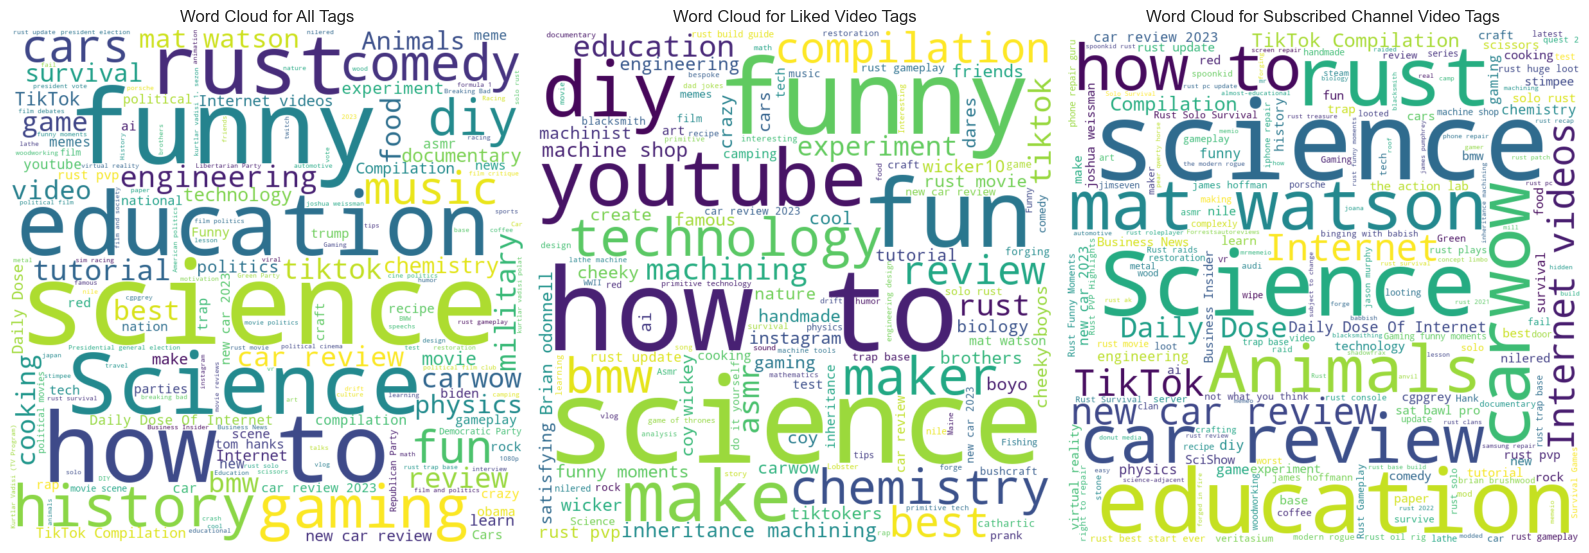

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load your dataset
df = pd.read_csv('data.csv')
df = df[~df['tags'].str.contains('shorts', case=False, na=False)]


# Ensure 'tags' is a list of strings and exclude non-strings or malformed data
def clean_tags(x):
    if isinstance(x, str):
        return x.strip("[]").replace("'", "").split(", ")
    return []

df['tags'] = df['tags'].apply(clean_tags)

# Remove duplicates based on a unique identifier (e.g., video ID)
df_unique = df.drop_duplicates(subset='id')

# Explode the DataFrame such that each tag gets its own row
tags_df = df_unique.explode('tags')

# Exclude empty or malformed tags
tags_df = tags_df[tags_df['tags'].apply(lambda x: isinstance(x, str) and x != "")]

# Frequency Analysis of Tags
tag_counts = tags_df['tags'].value_counts()

# Display the top 10 most frequent tags
print("Top 10 Most Frequent Tags:\n", tag_counts.head(10))

# Visualization: Word Cloud for All Tags
wordcloud_all = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud_all.generate_from_frequencies(Counter(tags_df['tags']))

# Visualization: Word Cloud for Liked Videos
liked_tags_df = tags_df[df_unique['liked'] == 1]
wordcloud_liked = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud_liked.generate_from_frequencies(Counter(liked_tags_df['tags']))

# Visualization: Word Cloud for Videos from Subscribed Channels
subscribed_tags_df = tags_df[df_unique['subscribed'] == 1]
wordcloud_subscribed = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud_subscribed.generate_from_frequencies(Counter(subscribed_tags_df['tags']))

# Plot the Word Clouds
plt.figure(figsize=(16, 8))

# Word Cloud for All Tags
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title("Word Cloud for All Tags")
plt.axis("off")

# Word Cloud for Liked Videos
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_liked, interpolation='bilinear')
plt.title("Word Cloud for Liked Video Tags")
plt.axis("off")

# Word Cloud for Subscribed Channel Videos
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_subscribed, interpolation='bilinear')
plt.title("Word Cloud for Subscribed Channel Video Tags")
plt.axis("off")

plt.tight_layout()
plt.show()


turns out i really like "how to diy funny science". nice

In [14]:
import pandas as pd

# Load your dataset
df = pd.read_csv('data.csv')
df = df[~df['tags'].str.contains('shorts', case=False, na=False)]


# Remove duplicates based on video IDs to ensure each video is counted only once
df_unique_videos = df.drop_duplicates(subset=['id'])

# Check the number of unique videos in the dataset
num_unique_videos = df_unique_videos.shape[0]
print(f"Number of unique videos in the dataset: {num_unique_videos}")

# Assuming tags are stored in a column named 'tags' and are in a string format
# where individual tags are separated by commas
if 'tags' in df_unique_videos.columns:
    # Split the 'tags' column into a list, remove duplicates, and count unique tags
    unique_tags = set(tag for taglist in df_unique_videos['tags'].dropna().apply(lambda x: x.split(", ")) for tag in taglist)
    num_unique_tags = len(unique_tags)
    print(f"Number of unique tags: {num_unique_tags}")
else:
    print("The dataset does not have a 'tags' column.")


Number of unique videos in the dataset: 24784
Number of unique tags: 128843


In [15]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('data.csv')
df = df[~df['tags'].str.contains('shorts', case=False, na=False)]

# Removing duplicates based on video IDs to ensure each video is counted only once
df_unique = df.drop_duplicates(subset=['id'])

# Extract and count tags
tag_series = df_unique['tags'].dropna().str.split(', ').explode()
top_tags = tag_series.value_counts().head(500).index

# Initialize a dictionary to hold the new columns
new_columns = {}

# Create a binary matrix for the presence of top tags
for tag in top_tags:
    escaped_tag = re.escape(tag)
    new_columns[f'tag_{tag}'] = df_unique['tags'].str.contains(escaped_tag, regex=True, na=False).astype(int)

# Concatenate the new columns to the original DataFrame
df_unique = pd.concat([df_unique, pd.DataFrame(new_columns)], axis=1)

# Select columns for correlation (including viewCount, likeCount, etc., and your like and subscription status)
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'duration_sec', 'liked', 'subscribed']  # Add your like and subscription status
tag_cols = list(new_columns.keys())
corr_cols = numeric_cols + tag_cols

# Calculate correlation
correlation_matrix = df_unique[corr_cols].corr()

# Now you can visualize or analyze the correlation matrix
# For example, you might want to see correlation of tags with viewCount:
view_corr_with_tags = correlation_matrix.loc['viewCount', tag_cols]

print(view_corr_with_tags.sort_values(ascending=False).head(10))  # Top 10 tags correlated with viewCount


tag_'videos'         0.114890
tag_'music video'    0.064586
tag_'hip hop'        0.042959
tag_'Music'          0.032592
tag_'rap'            0.032329
tag_'music'          0.022915
tag_'the'            0.021116
tag_'tiktok'         0.016335
tag_'hiphop'         0.014375
tag_'house'          0.011422
Name: viewCount, dtype: float64


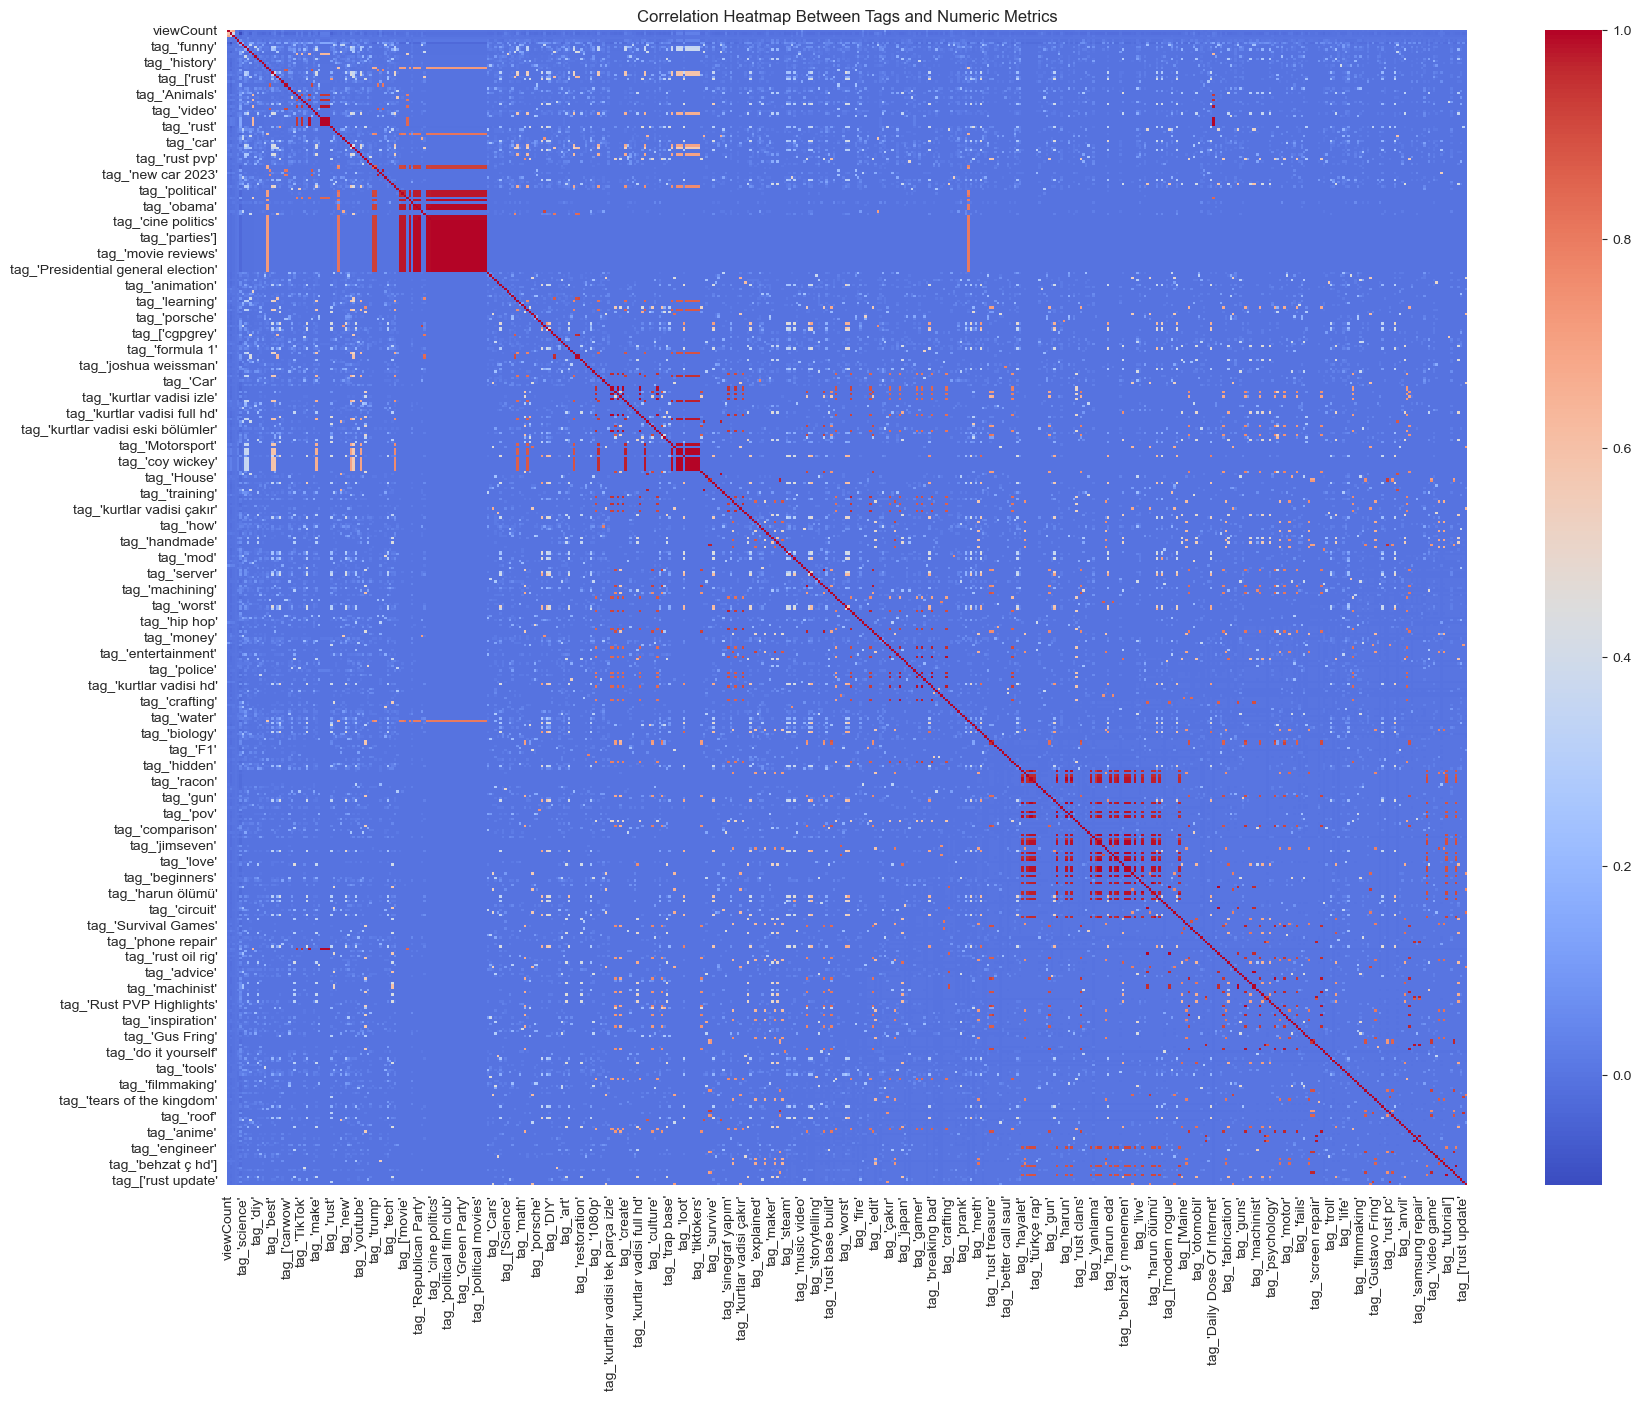

Top Correlated Tags with View Count:
 tag_'videos'         0.114890
tag_'music video'    0.064586
tag_'hip hop'        0.042959
tag_'Music'          0.032592
tag_'rap'            0.032329
tag_'music'          0.022915
tag_'the'            0.021116
tag_'tiktok'         0.016335
tag_'hiphop'         0.014375
tag_'house'          0.011422
Name: viewCount, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'correlation_matrix' and 'view_corr_with_tags' are already computed from the previous step

# Heatmap of Tag Correlations with Numeric Metrics
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Between Tags and Numeric Metrics')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Adjust y-axis labels orientation if necessary
plt.show()

# Analysis of Top Correlations
# Focusing on viewCount
top_correlated_tags_with_views = view_corr_with_tags.sort_values(ascending=False).head(10)
print("Top Correlated Tags with View Count:\n", top_correlated_tags_with_views)


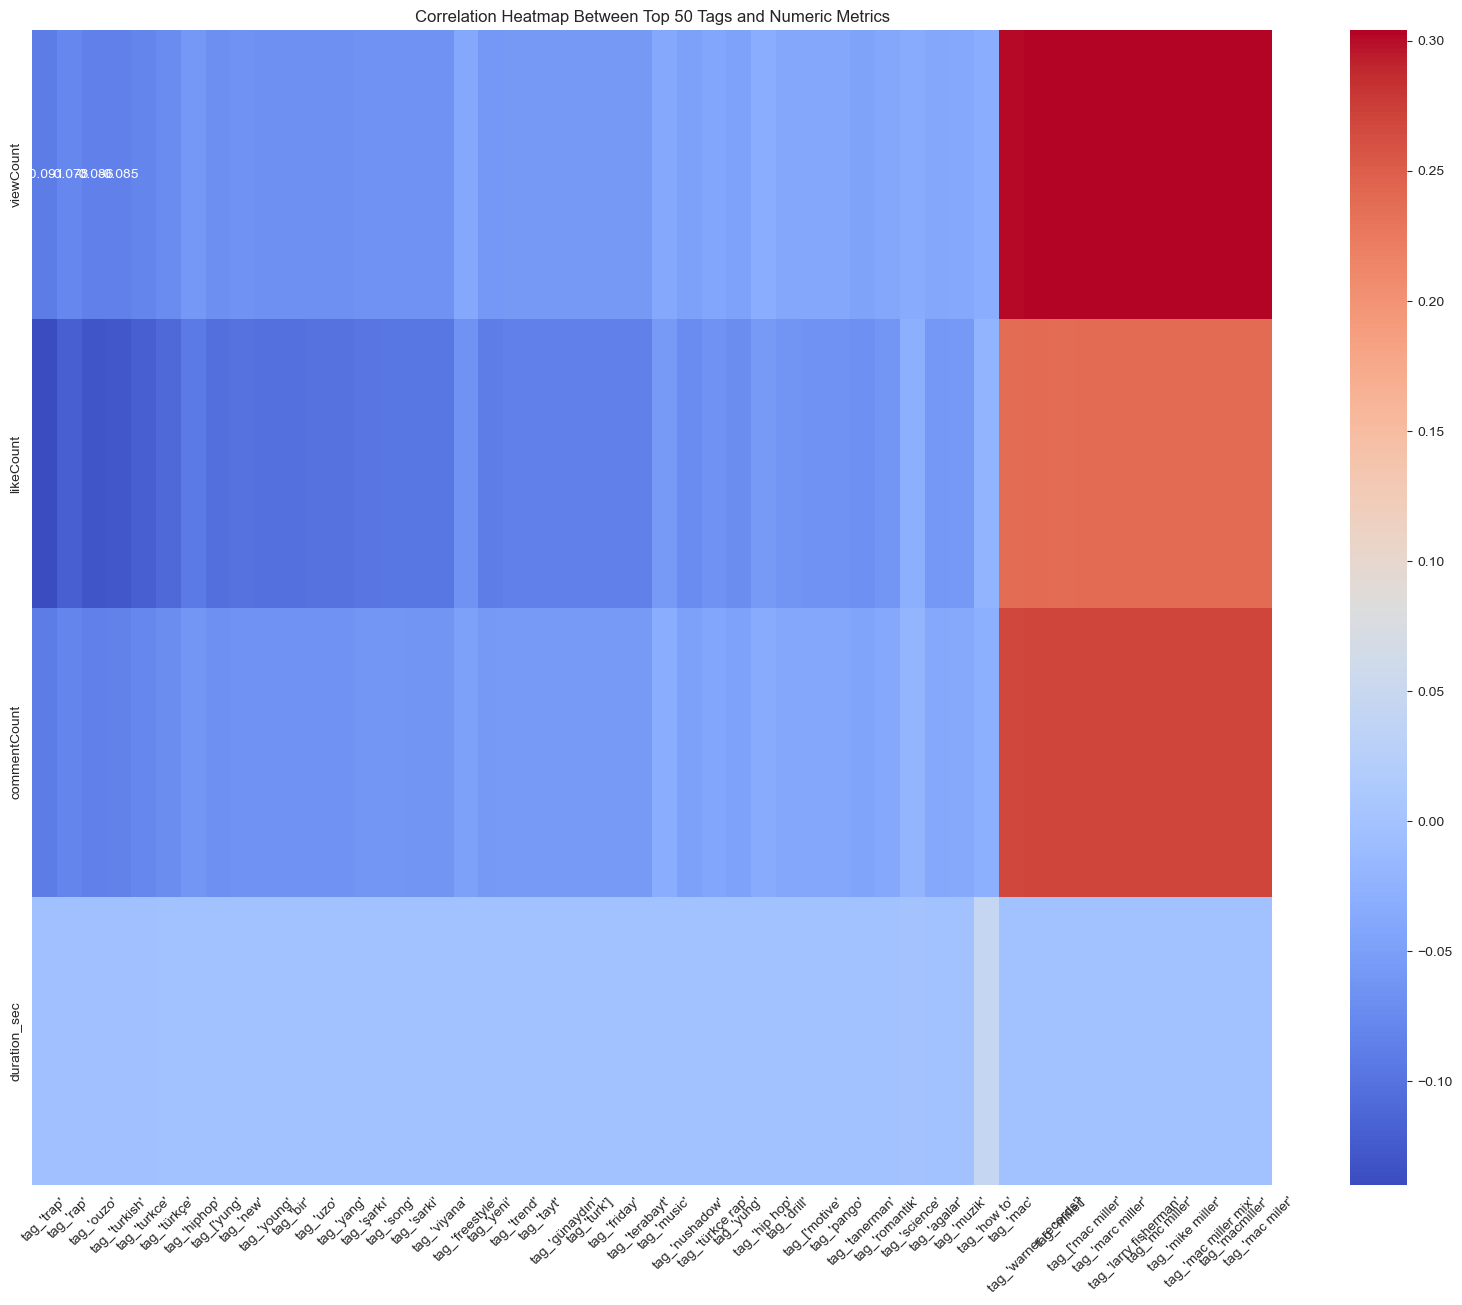

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('data.csv')

# Clean and split tags, and exclude videos with the 'shorts' tag
df = df[df['tags'].str.contains('shorts', case=False, na=True) == False]
df['tags'] = df['tags'].fillna('').str.split(', ').apply(lambda x: list(set(x)))

# Explode the DataFrame to get one row per tag
exploded_df = df.explode('tags')

# Count the occurrence of each tag
tag_counts = exploded_df['tags'].value_counts()

# Select the top 50 tags
top_50_tags = tag_counts.head(50).index.tolist()

# Create a binary matrix for the presence of top tags
for tag in top_50_tags:
    df[f'tag_{tag}'] = df['tags'].apply(lambda x: int(tag in x))

# Select columns for correlation (including viewCount, likeCount, etc.)
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'duration_sec']  # Add other relevant numeric columns
tag_cols = [f'tag_{tag}' for tag in top_50_tags]
corr_cols = numeric_cols + tag_cols

# Calculate correlation
correlation_matrix = df[corr_cols].corr()

# Extract the correlation of tags with numeric metrics
tag_corr_with_numeric = correlation_matrix.loc[numeric_cols, tag_cols]

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(tag_corr_with_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Top 50 Tags and Numeric Metrics')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

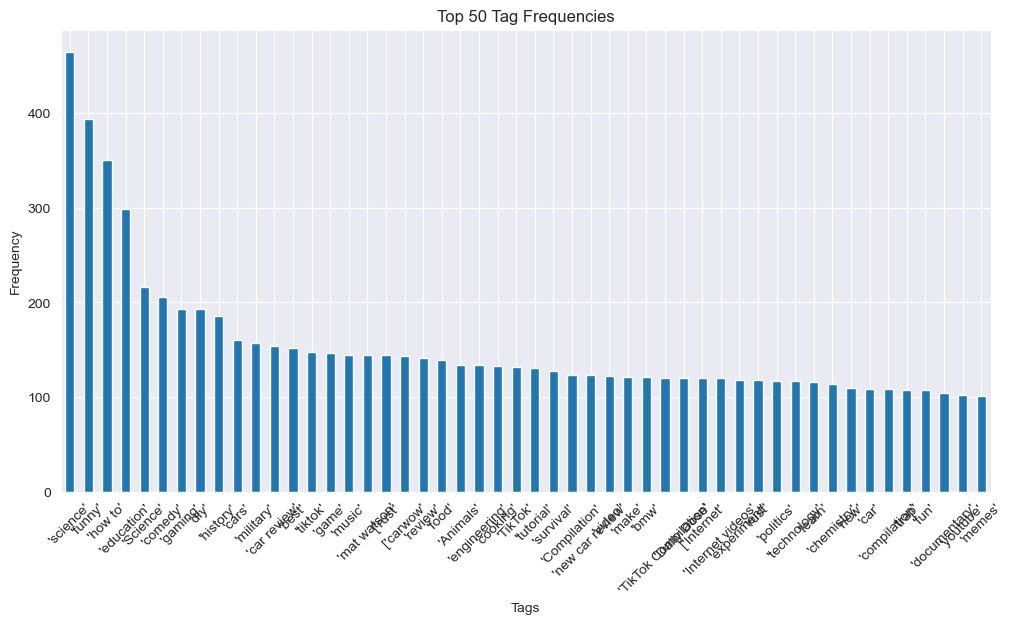

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Exclude videos with the 'shorts' tag
df = df[~df['tags'].str.contains('shorts', case=False, na=True)]

# Clean and split tags, ensuring uniqueness per video
df['tags'] = df['tags'].fillna('').str.split(', ').apply(lambda x: list(set(x)))

# Remove duplicate videos
df = df.drop_duplicates(subset=['id'])

# Explode the DataFrame to get one row per tag
exploded_df = df.explode('tags')

# Count the occurrence of each tag
tag_counts = exploded_df['tags'].value_counts()

# Select the top 50 tags and their counts
top_50_tag_counts = tag_counts.head(50)

# Create Histogram
plt.figure(figsize=(12, 6))
top_50_tag_counts.plot(kind='bar')
plt.title('Top 50 Tag Frequencies')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

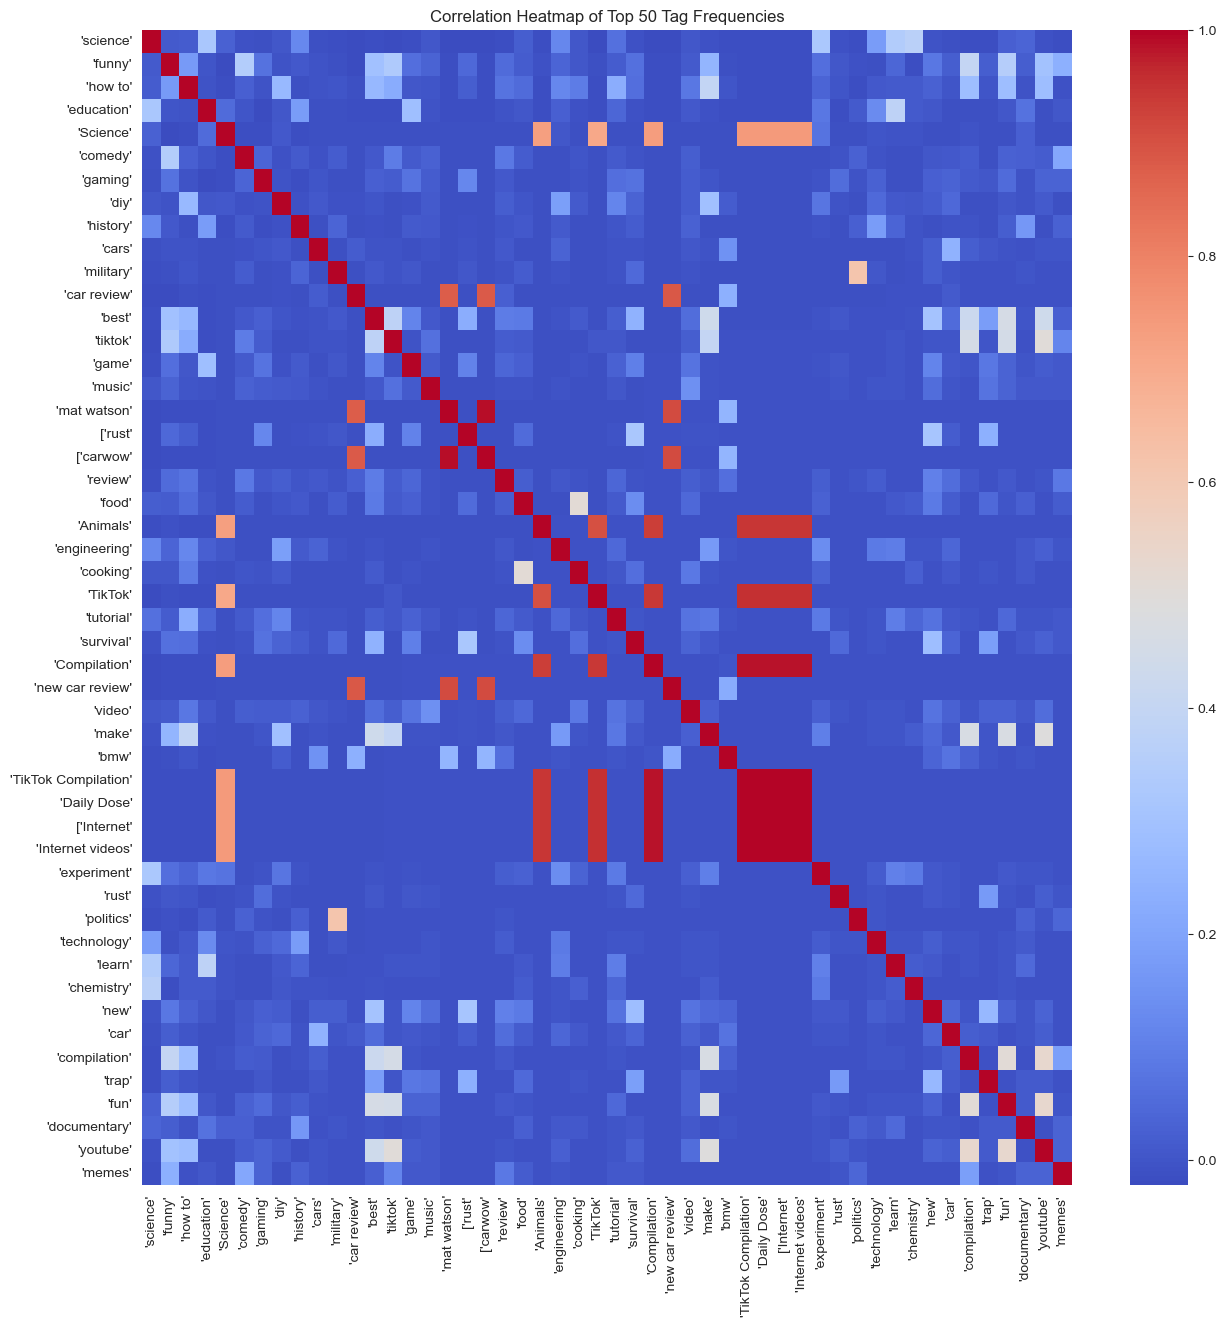

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Exclude videos with the 'shorts' tag and drop duplicates
df = df[~df['tags'].str.contains('shorts', case=False, na=True)]
df = df.drop_duplicates(subset=['id'])

# Clean and split tags, ensuring uniqueness per video
df['tags'] = df['tags'].fillna('').str.split(', ').apply(lambda x: list(set(x)))

# Explode the DataFrame to get one row per tag
exploded_df = df.explode('tags')

# Count the occurrence of each tag
tag_counts = exploded_df['tags'].value_counts()

# Select the top 50 tags
top_50_tags = tag_counts.head(50).index

# Create a binary matrix for the presence of top 50 tags
binary_matrix = pd.DataFrame(index=df.index)
for tag in top_50_tags:
    binary_matrix[tag] = df['tags'].apply(lambda tags: 1 if tag in tags else 0)

# Calculate correlation matrix
tag_correlation_matrix = binary_matrix.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(tag_correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 50 Tag Frequencies')
plt.show()


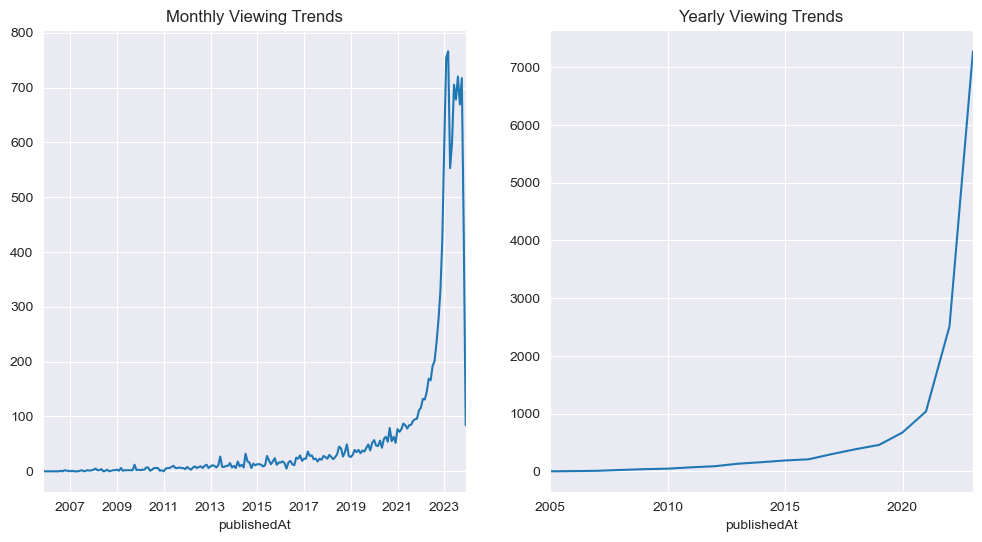

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Exclude videos with the 'shorts' tag and drop duplicates
df = df[~df['tags'].str.contains('shorts', case=False, na=True)]
df = df.drop_duplicates(subset=['id'])

# Clean and split tags, ensuring uniqueness per video
df['tags'] = df['tags'].fillna('').str.split(', ').apply(lambda x: list(set(x)))


# Convert 'publishedAt' to datetime for trend analysis
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Monthly and yearly trends
monthly_trends = df.resample('M', on='publishedAt').size()
yearly_trends = df.resample('Y', on='publishedAt').size()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_trends.plot(title='Monthly Viewing Trends')
plt.subplot(1, 2, 2)
yearly_trends.plot(title='Yearly Viewing Trends')
plt.show()


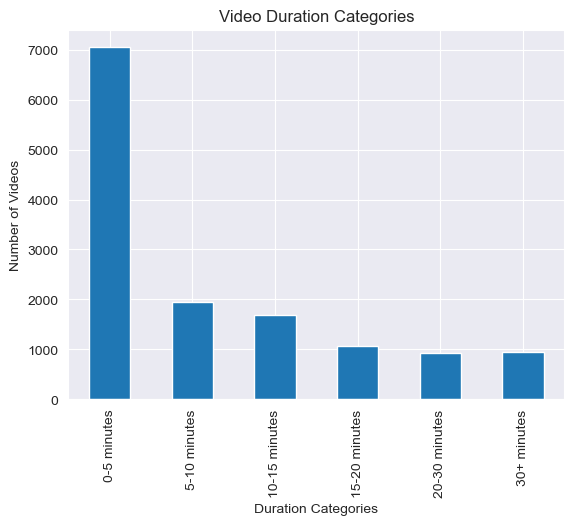

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Exclude videos with the 'shorts' tag and drop duplicates
df = df[~df['tags'].str.contains('shorts', case=False, na=True)]
df = df.drop_duplicates(subset=['id'])


# Define the bins for the duration
bins = [0, 5*60, 10*60, 15*60, 20*60, 30*60, float('inf')]
labels = ['0-5 minutes', '5-10 minutes', '10-15 minutes', '15-20 minutes', '20-30 minutes', '30+ minutes']

# Categorize the videos based on duration
df['duration_category'] = pd.cut(df['duration_sec'], bins=bins, labels=labels, right=False)

# Count the number of videos in each category
duration_category_counts = df['duration_category'].value_counts(sort=False)

# Plotting the distribution of video duration categories
duration_category_counts.plot(kind='bar', title='Video Duration Categories')
plt.xlabel('Duration Categories')
plt.ylabel('Number of Videos')
plt.show()


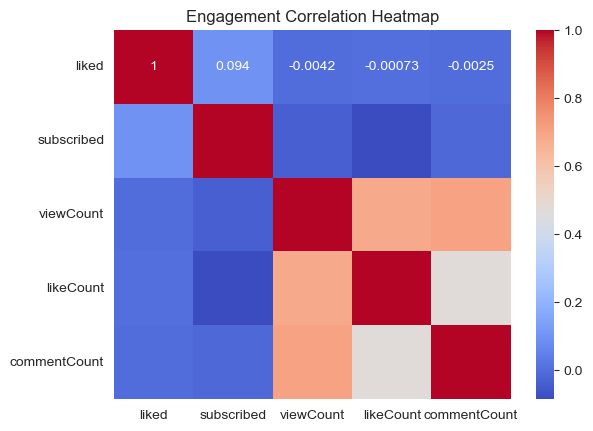

In [15]:
# Correlation between views, likes, and comments
engagement_cols = ['liked', 'subscribed', 'viewCount', 'likeCount', 'commentCount']
engagement_corr = df[engagement_cols].corr()

sns.heatmap(engagement_corr, annot=True, cmap='coolwarm')
plt.title('Engagement Correlation Heatmap')
plt.show()


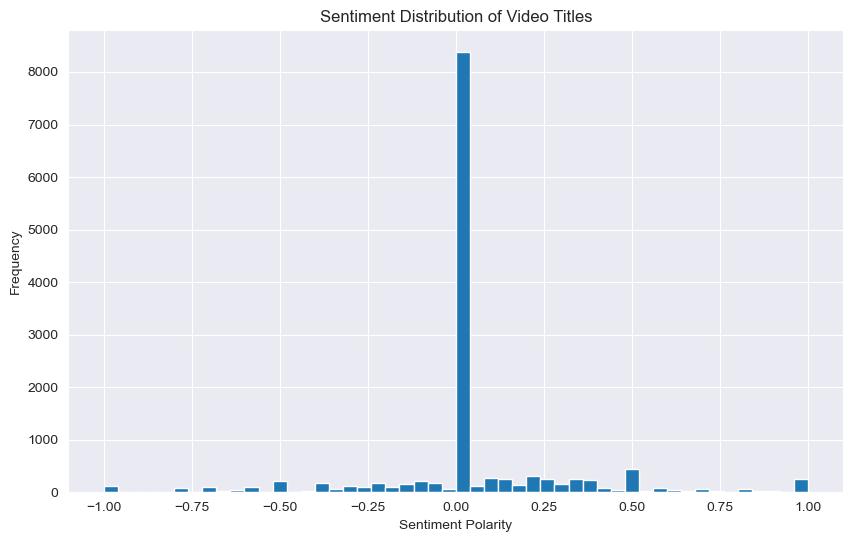

In [16]:
from textblob import TextBlob

# Perform sentiment analysis on video titles
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of title sentiment
plt.figure(figsize=(10, 6))
df['title_sentiment'].plot(kind='hist', bins=50, title='Sentiment Distribution of Video Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [20]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


# Select the top 10 videos by view count
top_videos = df.nlargest(50, 'viewCount')

# Create the base scatter plot
fig = go.Figure(data=[go.Scatter(
    x=top_videos['viewCount'],
    y=top_videos['likeCount'],
    mode='markers',
    marker=dict(color='LightSkyBlue'),
    text=top_videos['title'],  # hover text goes here
    hoverinfo='text+x+y')])

# Add image traces for each thumbnail
for index, row in top_videos.iterrows():
    # Note: The image URL must be secure (https) and CORS enabled
    fig.add_layout_image(
        dict(
            source=row['thumbnails.default.url'],
            xref="x",
            yref="y",
            x=row['viewCount'],
            y=row['likeCount'],
            sizex=20000,  # These values will need to be tweaked
            sizey=20000,  # These values will need to be tweaked
            xanchor="center",
            yanchor="middle"
        )
    )

# Set the axes to log scale
fig.update_xaxes(type='log')
fig.update_yaxes(type='log')

# Update layout
fig.update_layout(title='Top 50 Videos by View Count',
                  xaxis_title='View Count',
                  yaxis_title='Like Count')

# Show the figure
fig.show()


In [22]:
df.head(20)

,Unnamed: 0,kind,etag,id,publishedAt,channelId,title,description,channelTitle,categoryId,...,regionRestriction.allowed,viewCount,likeCount,favoriteCount,commentCount,duration_sec,liked,subscribed,duration_category,title_sentiment
1,1,youtube#video,W7k3TkwL2TexwZtz3HYNPsiYYF4,zlzzO1e6dws,2018-08-22T17:30:00Z,UCRHZGz8g6b10rcvhcaq1M5A,How to Download Your YouTube History! Download...,Hey guys my name is Scoby and in todays video ...,Scoby Tech,27,...,NaN,37912.0,433.0,0.0,47.0,129.0,False,False,0-5 minutes,0.000000
2,2,youtube#video,ZF9ByX3rH8mu61jbYViFD4Y0xlo,N-4prIh7t38,2021-09-11T23:19:54Z,UChQtiqWWOhPB0SSi7Xmxx7Q,JSON API: Explained in 4 minutes (+ EXAMPLES),In this video I give a basic overview of the J...,TheAdimar,27,...,NaN,21579.0,460.0,0.0,12.0,251.0,False,False,0-5 minutes,0.000000
3,3,youtube#video,awGRQQRtWYUO0i0f2fYHbw8MLQQ,d5PBq6k4uzM,2023-09-09T14:26:42Z,UCrUL8K81R4VBzm-KOYwrcxQ,JSON in 5 minutes or less,Come and let me bestow upon you the glory that...,Engineer Man,28,...,NaN,13148.0,727.0,0.0,39.0,312.0,False,False,5-10 minutes,-0.166667
4,4,youtube#video,WGGKuXepelwEEjupFYUTmp3nCoI,5qtC-tsQ-wE,2020-02-23T11:59:11Z,UCbXgNpp0jedKWcQiULLbDTA,YouTube Data API Tutorial with Python - Analyz...,In this Python Tutorial we will be learning ho...,Patrick Loeber,27,...,NaN,37597.0,733.0,0.0,85.0,1242.0,False,False,20-30 minutes,0.000000
5,5,youtube#video,CXNMSyIlLVcHooQ5EIP5vMP-tuE,zVtS5fBXOa0,2022-08-01T13:00:41Z,UCvjXo25nY-WMCTEXZZb0xsw,Subscribe to Channels using YouTube Data API,Videos on Google OAuth2: https://www.youtube.c...,Anson the Developer,26,...,NaN,4146.0,51.0,0.0,6.0,915.0,False,False,15-20 minutes,0.000000
6,6,youtube#video,x_CkbRvklcMS7_3nQp0EFZXKMJU,nZkb_l0H80o,2023-03-30T03:27:06Z,UCmZh4TFaZDcpwNW9jxty5ig,【Google OAuth】AttributeError: 'InstalledAppFlo...,【Google OAuth】AttributeError: 'InstalledAppFlo...,Peter Schneider,27,...,NaN,841.0,2.0,0.0,1.0,192.0,False,False,0-5 minutes,0.000000
7,7,youtube#video,ZtYeMQEntMnYanIRmDiRX1Zhu68,c9YySJu39_k,2014-07-27T11:24:40Z,UCz1UfNp9VFp9R1HEFn5PY5A,Kurtlar Vadisi Pusu - 1. Bölüm,Kurtlar Vadisi Pusu tüm bölümleriyle Youtube'd...,Kurtlar Vadisi Pusu,1,...,NaN,21836193.0,119259.0,0.0,15636.0,5372.0,False,False,30+ minutes,0.000000
9,8,youtube#video,zu1yVexyQzrOv0k9r-9Mf_TwOrg,_bpcHt4YZpg,2023-05-25T21:00:16Z,UCW0vElFuUm1RXTOPUFZaf8g,Yung Ouzo & Reckol - Mevzular (prod. by fireon...,►'Mevzular' OUT NOW: https://stageart.lnk.to/m...,Yung Ouzo,10,...,NaN,266787.0,2681.0,0.0,145.0,144.0,False,True,0-5 minutes,0.000000
12,9,youtube#video,__JB42RNtGnU1Q7BCi0iXe8_5Hw,vQQEaSnQ_bs,2020-09-10T14:15:03Z,UCCezIgC97PvUuR4_gbFUs5g,Python YouTube API Tutorial: Using OAuth to Ac...,"In this Python Programming Tutorial, we'll be ...",Corey Schafer,27,...,NaN,137574.0,2649.0,0.0,351.0,2601.0,False,False,30+ minutes,0.000000
13,10,youtube#video,AwTbB14lZ87cZV5IIjI-aUM6A2A,D56_Cx36oGY,2022-01-22T16:31:46Z,UCJQJAI7IjbLcpsjWdSzYz0Q,Youtube API for Python: How to Create a Unique...,👩🏻‍💻 My laptop and iPad for doing DS/ study 👉 ...,Thu Vu data analytics,22,...,NaN,58192.0,2700.0,0.0,177.0,1353.0,False,False,20-30 minutes,0.375000
